In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import knn as kalmann
from load import load_bikes_data
from tqdm import tqdm 
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from  tqdm.auto import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150

##  Load Data

In [18]:
X,y = load_bikes_data()
print(y.shape)
print(X.shape)

(17379,)
(17379, 14)


## Preprocess Data

In [19]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

## Partition Dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=.5)
X_val,X_test, y_val,y_test = train_test_split(X_test,y_test,test_size=0.5)
print(f'Train Shape: {X_train.shape}')
print(f'Validation Shape: {X_val.shape}')
print(f'Test shape: {X_test.shape}')

Train Shape: (8689, 14)
Validation Shape: (4345, 14)
Test shape: (4345, 14)


## Create EKF network 

In [21]:
n_inputs = X_train.shape[1]

knn_ekf = kalmann.KNN(nu=n_inputs, ny=1, nl=10, neuron='relu')


In [22]:
nepochs = 100
tolerance = 1e-4
patience = 20
RMS,_=knn_ekf.train(nepochs=nepochs, U=X_train, Y=y_train, 
                    U_val=X_val,Y_val=y_val, method='ekf', 
                    P=100, Q=10e-6, R=10,
                    tolerance=tolerance,patience=patience)


Training...





  0%|                                                                                          | 0/100 [00:00<?, ?it/s]


Epoch: 1 Rms Error: 2.940e+02:   0%|                                                           | 0/100 [00:00<?, ?it/s]


Epoch: 1 Rms Error: 2.940e+02:   1%|▌                                                  | 1/100 [00:02<03:33,  2.16s/it]


Epoch: 2 Rms Error: 1.331e-01:   1%|▌                                                  | 1/100 [00:02<03:33,  2.16s/it]


Epoch: 2 Rms Error: 1.331e-01:   2%|█                                                  | 2/100 [00:04<03:34,  2.19s/it]


Epoch: 3 Rms Error: 8.582e-02:   2%|█                                                  | 2/100 [00:04<03:34,  2.19s/it]


Epoch: 3 Rms Error: 8.582e-02:   3%|█▌                                                 | 3/100 [00:06<03:32,  2.19s/it]


Epoch: 4 Rms Error: 6.735e-02:   3%|█▌                                                 | 3/100 [00:06<03:32,  2.19s/it]


Epoch: 4 Rms Error: 6


Converged after 27 epochs!




In [23]:
RMS[-1]

0.03046291983243491

In [28]:
y_pred= knn_ekf.feedforward(X_test)
error = mean_squared_error(y_test,y_pred)
np.sqrt(error)

0.029132270271650718

## Plotting RMS decrease

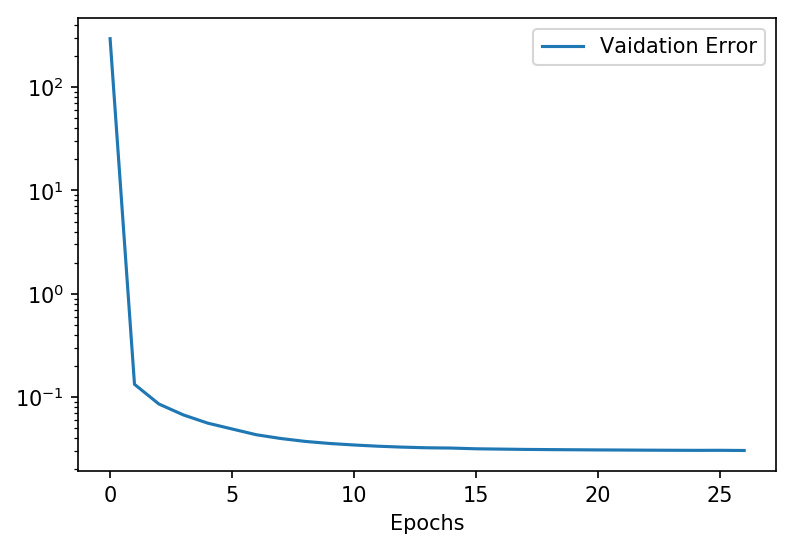

In [25]:
plt.plot(range(len(RMS)),RMS,label="Vaidation Error")
plt.xlabel("Epochs")
plt.legend()
plt.yscale('log')

## Save file 

In [11]:
# knn_ekf.save("saved_models/efk_nn_relu_P_100_Q_10e-6_R_10")